In [177]:
# Importo las librerias al igual que en el otro EDA
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [178]:
#Descargo las tablas con informacion de S&P500 en la wiki
sp500= pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500

[    Symbol              Security             GICS Sector  \
 0      MMM                    3M             Industrials   
 1      AOS           A. O. Smith             Industrials   
 2      ABT                Abbott             Health Care   
 3     ABBV                AbbVie             Health Care   
 4      ACN             Accenture  Information Technology   
 ..     ...                   ...                     ...   
 498    YUM           Yum! Brands  Consumer Discretionary   
 499   ZBRA    Zebra Technologies  Information Technology   
 500    ZBH         Zimmer Biomet             Health Care   
 501   ZION  Zions Bancorporation              Financials   
 502    ZTS                Zoetis             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  Date added  \
 0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
 1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
 2                 Heal

In [179]:
 #guardo el primer dataset
sp500= sp500[0]


In [180]:
# Dataset con toda la info sobre los indices
sp500['GICS Sector'].value_counts()

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64

In [181]:
# Los separo por un sector de mi interes, en este caso los de data
sp500[sp500['GICS Sector']=='Energy']

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
43,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
57,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,1701605,2017
104,CVX,Chevron Corporation,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,93410,1879
123,COP,ConocoPhillips,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,1163165,2002
133,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,858470,2021 (1989)
145,DVN,Devon Energy,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,1971
147,FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,1539838,2007
174,EOG,EOG Resources,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,821189,1999
176,EQT,EQT,Energy,Oil & Gas Exploration & Production,"Pittsburgh, Pennsylvania",2022-10-03,33213,1888
190,XOM,ExxonMobil,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,34088,1999


In [182]:
# lo guardo en un dataframe
df=sp500[sp500['GICS Sector']=='Energy']

In [183]:
# Creo una serie con todos los indices del sector que escogí.
tickers = df['Symbol'].tolist()

In [184]:
tickers

['APA',
 'BKR',
 'CVX',
 'COP',
 'CTRA',
 'DVN',
 'FANG',
 'EOG',
 'EQT',
 'XOM',
 'HAL',
 'HES',
 'KMI',
 'MRO',
 'MPC',
 'OXY',
 'OKE',
 'PSX',
 'PXD',
 'SLB',
 'TRGP',
 'VLO',
 'WMB']

In [185]:
# Separo la data con su respectivo indice
dataset=None
for indx, tickers in enumerate(tickers):
  temp = yf.download(tickers, start= '2000-01-01')
  temp['Date'] = temp.index
  temp['Stock'] = tickers
  if (indx == 0):
    print('1')
    dataset=temp
  else:
    print('2')
    dataset=dataset.append(temp)

[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


[*********************100%***********************]  1 of 1 completed
2


C:\Users\gianp\AppData\Local\Temp\ipykernel_2112\165469885.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset=dataset.append(temp)


In [186]:
# Reseteo el indice por que ya tengo una columna con la fecha.
dataset.reset_index(drop=True)

,Open,High,Low,Close,Adj Close,Volume,Date,Stock
0,15.882035,15.882035,14.745671,14.772727,11.330817,1082697,2000-01-03,APA
1,14.285714,14.556277,13.961039,14.123377,10.832755,2959572,2000-01-04,APA
2,14.231602,14.583333,14.123377,14.529221,11.144044,2170014,2000-01-05,APA
3,14.935065,16.017317,14.745671,15.909091,12.202416,2416029,2000-01-06,APA
4,16.125542,16.450216,15.557359,15.854978,12.160905,1709169,2000-01-07,APA
...,...,...,...,...,...,...,...,...
119258,30.879999,31.260000,30.520000,30.910000,30.910000,8341900,2023-02-22,WMB
119259,31.180000,31.309999,30.809999,31.049999,31.049999,5820300,2023-02-23,WMB
119260,30.760000,31.200001,30.660000,31.180000,31.180000,5462000,2023-02-24,WMB
119261,31.049999,31.230000,30.629999,30.700001,30.700001,7790500,2023-02-27,WMB


In [187]:
#Reviso algunos problemas que pueda haber
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
Stock        0
dtype: int64

In [188]:
#Aquí descargaba el dataset para revisarlo por si fuese a realizar cambios
#dataset.to_csv('energy.csv')

In [189]:
#revisiones
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,119263.000000,119263.000000,119263.000000,119263.000000,119263.000000,1.192630e+05
mean,49.188533,49.857068,48.481484,49.179396,38.147955,6.815460e+06
std,34.710568,35.130414,34.260610,34.703687,30.130893,6.857283e+06
min,0.717376,0.937480,0.635856,0.717376,0.333410,0.000000e+00
25%,22.825130,23.190001,22.420000,22.799999,16.769946,2.653350e+06
50%,41.290001,41.889999,40.669998,41.271816,30.365244,4.906800e+06
75%,68.290001,69.169998,67.360001,68.276867,52.727764,8.779050e+06
max,286.489990,288.459991,282.309998,285.279999,269.000458,2.739966e+08


In [190]:
# Cantidad de resultados por indice
dataset['Stock'].value_counts()

APA     5826
HAL     5826
VLO     5826
SLB     5826
PXD     5826
OKE     5826
OXY     5826
MRO     5826
BKR     5826
HES     5826
XOM     5826
EQT     5826
EOG     5826
DVN     5826
CTRA    5826
COP     5826
CVX     5826
WMB     5826
TRGP    3077
KMI     3031
MPC     2939
PSX     2738
FANG    2610
Name: Stock, dtype: int64

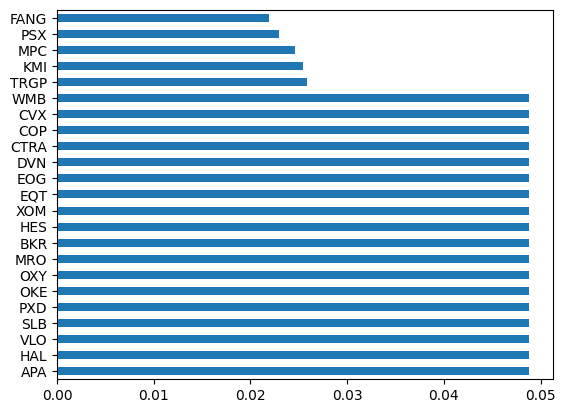

In [191]:
#Cantidad de resultados por indice en gráfico
dataset.Stock.value_counts(normalize=True).plot.barh()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

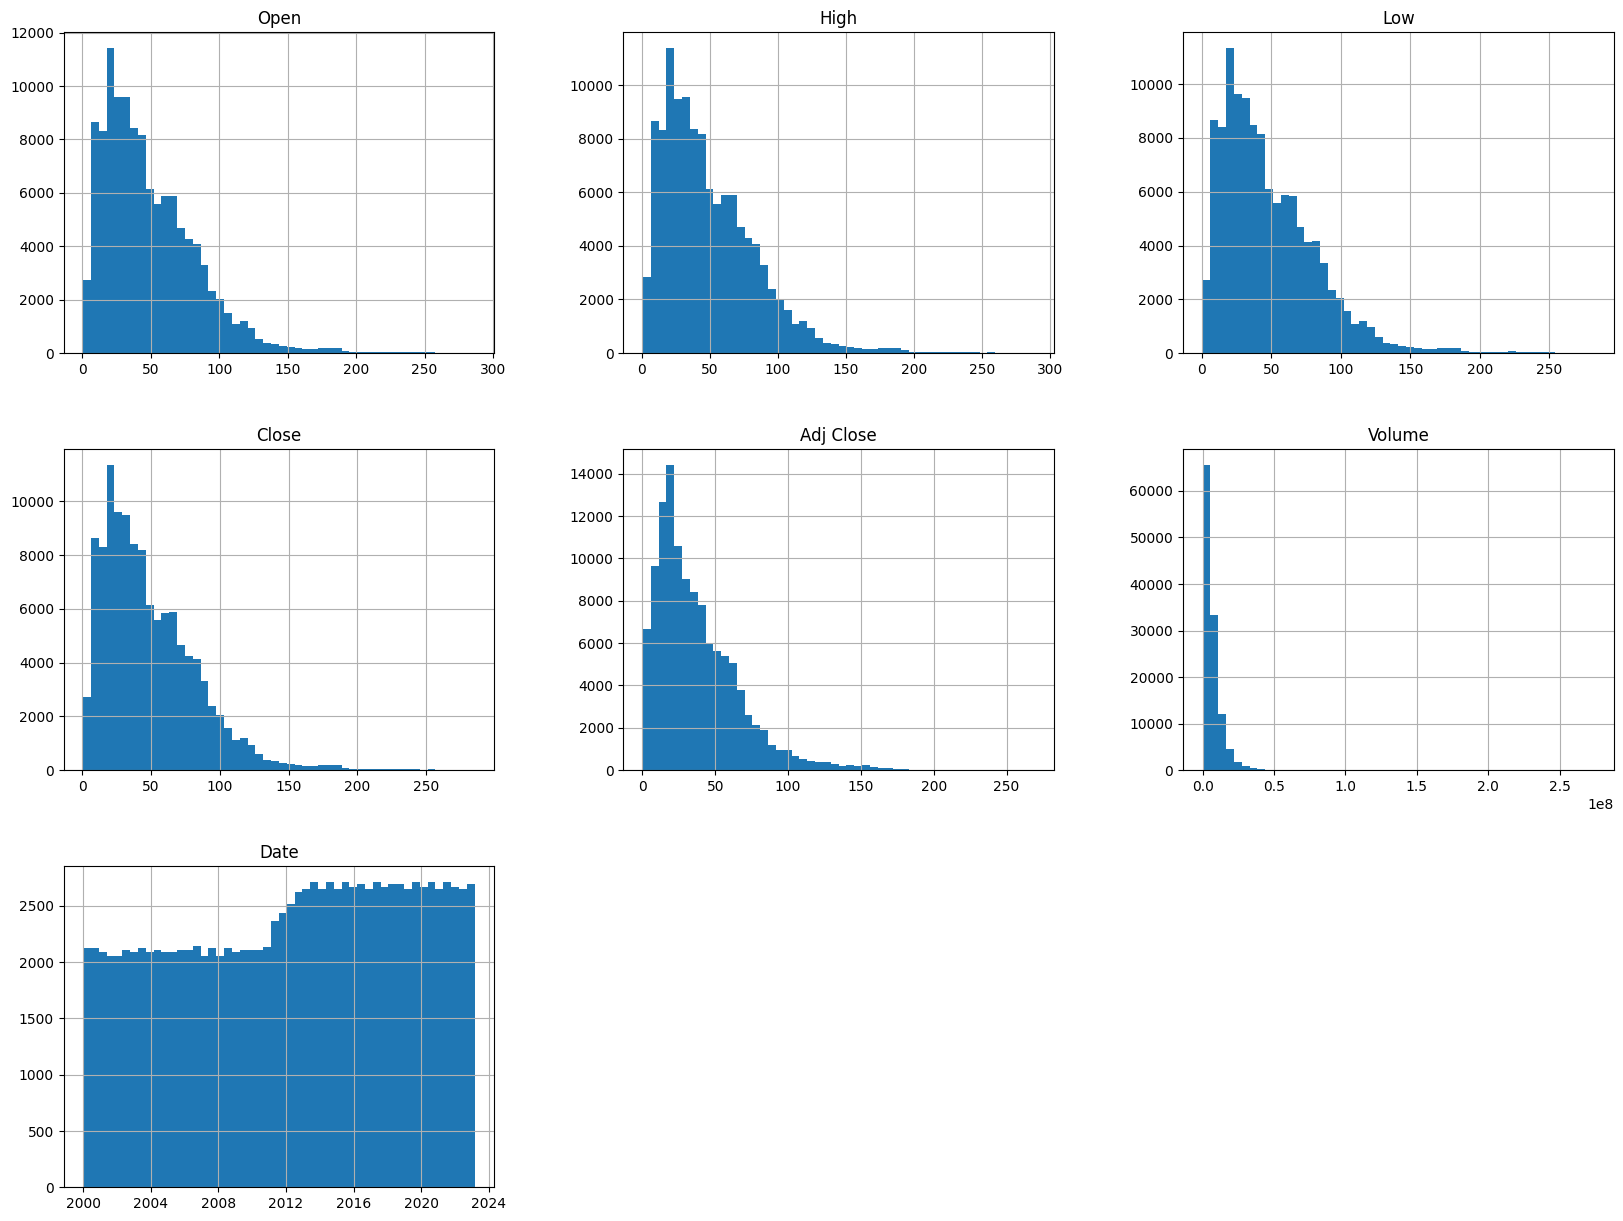

In [192]:
# Reviso que valores se toman en cada columna.
dataset.hist(bins = 50, figsize = (20,15))
plt.show

<Axes: xlabel='Close', ylabel='Count'>

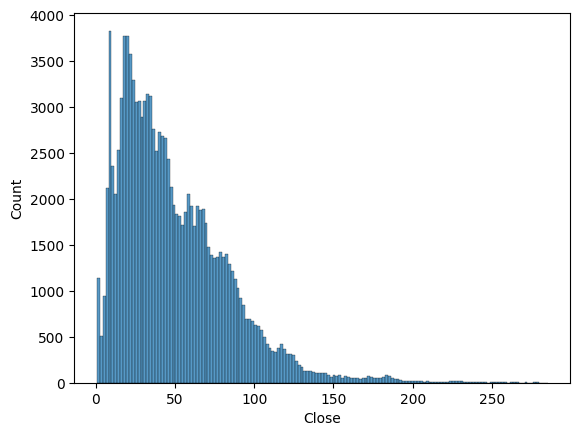

In [193]:
# Reviso el retorno principalmente.
sns.histplot(dataset['Close'])

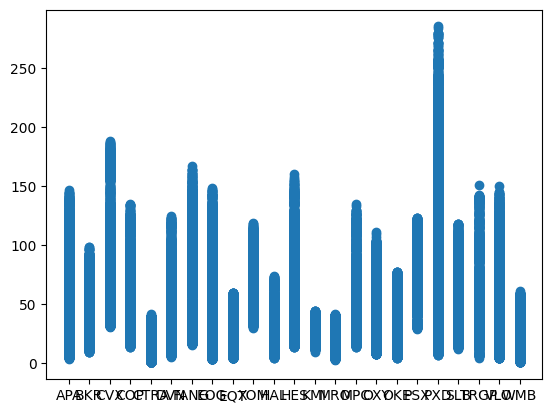

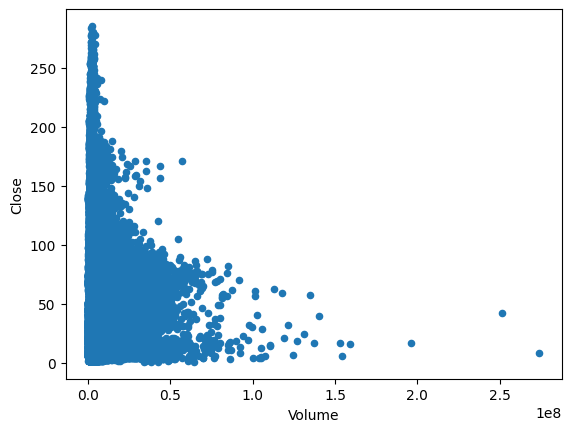

In [194]:
# Relacion que aguarda el indice y el retorno como  el volumen y el retorno.
plt.scatter(dataset.Stock,dataset.Close)
plt.show()

dataset.plot.scatter(x="Volume",y="Close")
plt.show()

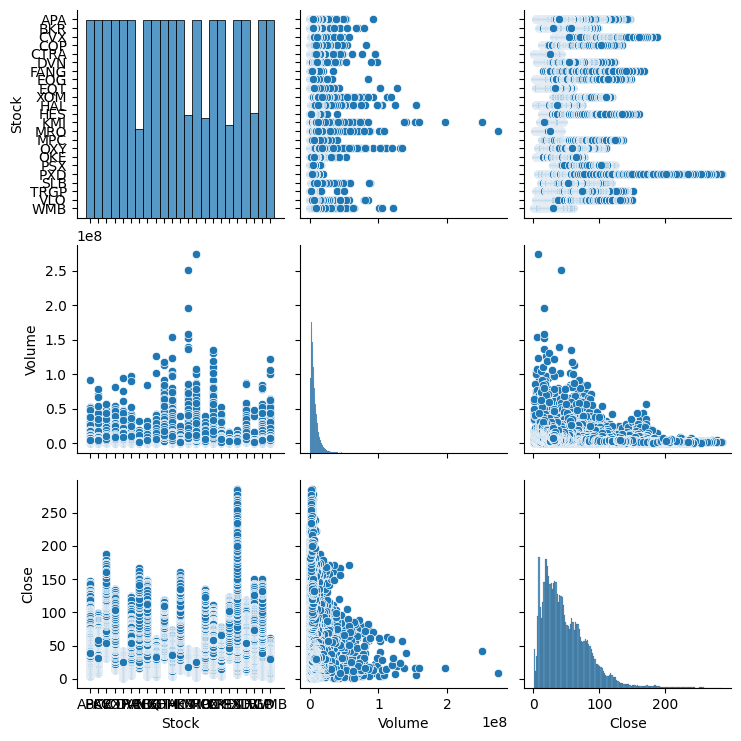

In [195]:
sns.pairplot(data = dataset, vars=['Stock','Volume','Close'])
plt.show()

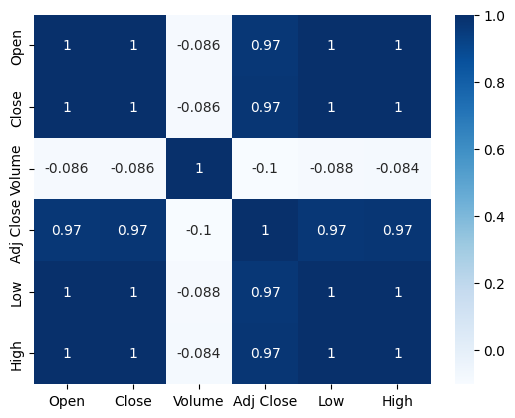

In [196]:
# Diagrama de relación.
sns.heatmap(dataset[['Open','Close','Volume','Adj Close','Low','High']].corr(), annot=True, cmap = 'Blues')
plt.show()

In [197]:
#Media por indice
dataset.groupby('Stock')['Close'].mean()

Stock
APA     57.352055
BKR     44.302953
COP     49.432188
CTRA    15.140253
CVX     87.290401
DVN     48.060346
EOG     55.897974
EQT     24.394273
FANG    84.413467
HAL     30.739214
HES     55.537579
KMI     24.653029
MPC     51.305628
MRO     18.875664
OKE     32.350333
OXY     53.171021
PSX     80.334631
PXD     96.504198
SLB     55.900042
TRGP    54.137062
VLO     45.245499
WMB     24.685584
XOM     68.992152
Name: Close, dtype: float64

In [198]:
#Mediana por indice
dataset.groupby('Stock')['Close'].median()

Stock
APA     50.975000
BKR     40.860001
COP     49.574347
CTRA    15.376250
CVX     89.915001
DVN     46.289999
EOG     50.627501
EQT     22.228228
FANG    85.725002
HAL     31.307500
HES     54.635000
KMI     20.410000
MPC     48.759998
MRO     17.450001
OKE     27.224077
OXY     59.845049
PSX     80.599998
PXD     86.119999
SLB     58.295000
TRGP    46.939999
VLO     45.160000
WMB     25.067400
XOM     73.099998
Name: Close, dtype: float64

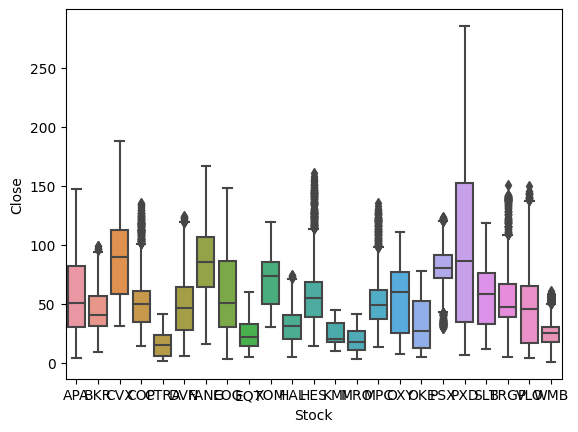

In [199]:
# Caja de bigotes por cada indice
sns.boxplot(x=dataset.Stock, y=dataset.Close)
plt.show()

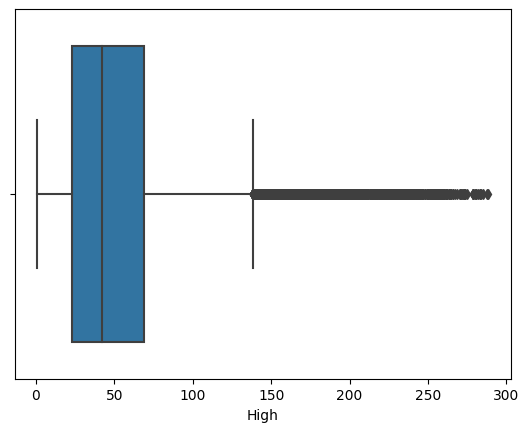

In [200]:
#Revision de outliers
sns.boxplot(x = 'High', data = dataset)
plt.show()

In [201]:
print(dataset.High.max())
print(dataset.High.min())

288.4599914550781
0.9374799728393555


In [202]:
#Quartiles
Q1 = dataset['High'].quantile(0.25)
Q3 = dataset['High'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

23.190000534057617
69.16999816894531
45.979997634887695
-45.779995918273926
138.13999462127686


In [203]:
# Se revisa un momento el tamaño del data frame principal.
print('Cantidad de registros totales:', dataset.shape[0]) # 
print('Cantidad de outliers:', dataset[(dataset['High']<BI) | (dataset['High']>BS)].shape[0] )

Cantidad de registros totales: 119263
Cantidad de outliers: 2576


In [204]:
#Deicidi no cambiar nada puesto que hay ciertos problemas para gráficas una ves retirados algunos outliers en el power bi.
'''
# Se eliminan aquellos datos fuera de el bigote, por encima y por debajo y lo almaceno en el dataframe de transición.
out_duration_int=(dataset['High']<BI) | (dataset['High']>BS)
dataset = dataset[~out_duration_int]
print(dataset.shape[0])
'''

"\n# Se eliminan aquellos datos fuera de el bigote, por encima y por debajo y lo almaceno en el dataframe de transición.\nout_duration_int=(dataset['High']<BI) | (dataset['High']>BS)\ndataset = dataset[~out_duration_int]\nprint(dataset.shape[0])\n"

<Axes: xlabel='Volume', ylabel='Count'>

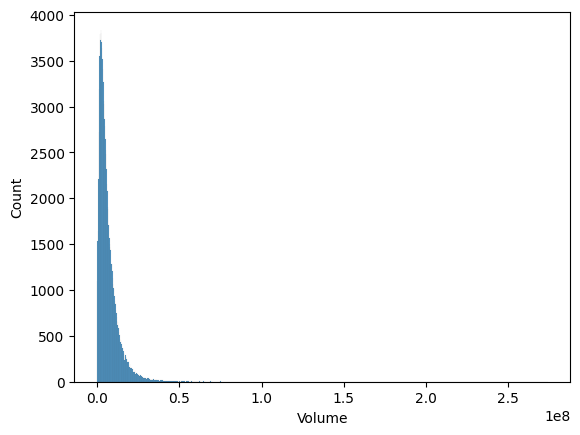

In [205]:
sns.histplot(dataset['Volume'])

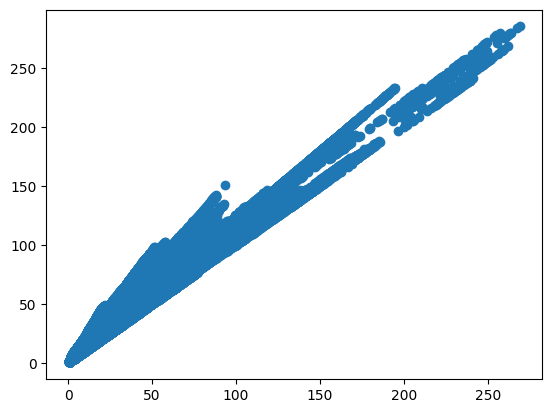

In [206]:
# SE muestra asi en consideración de los distintos resultados para las distintas empresas.
plt.scatter(dataset['Adj Close'], dataset['Close'])
plt.show()

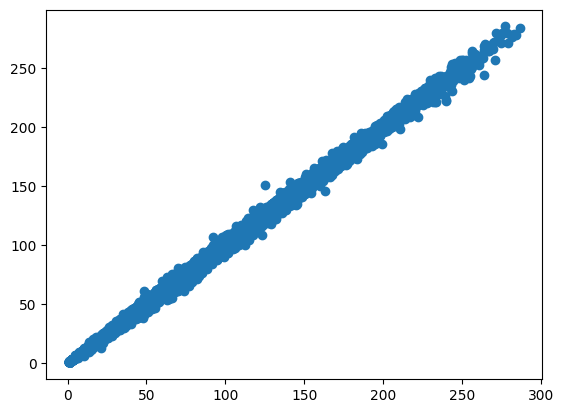

In [207]:
#Relacion entre Inversion y Precio de cierre.
plt.scatter(dataset['Open'], dataset['Close'])
plt.show()

In [208]:
dataset.to_csv('energy.csv')

In [ ]:
df = 